In [1]:
import pandas as pd
import numpy as np
import scipy
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
import statsmodels.api
from scipy import stats
from statsmodels.formula.api import ols
import math
import scipy.stats as scst
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid") # make the plot (like histogram) has clearer looking
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans, ttest_ind
from scipy.stats.mstats import winsorize


In [2]:
bike = pd.read_csv (r"C:/Data/bike_day.csv",sep = ",")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Q1 
Calculate the average rental count on working days and the average rental count on non-working day

In [3]:
cnt = bike['cnt']
cnt_work = cnt[(bike['workingday'] == 1)]
cnt_off = cnt[(bike['workingday'] == 0)]

In [4]:
print(mean(cnt_work))
print(mean(cnt_off))
# OR another way as using the code below
print(bike.groupby(['workingday']).agg({'cnt': 'mean'}) )

4584.82
4330.168831168831
                    cnt
workingday             
0           4330.168831
1           4584.820000


# Q2

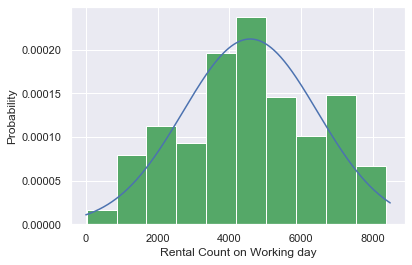

In [5]:
# check  the  normality  of  the  rental  count  on  working  days
# histogram with normal density curve
# QQ plot
# Shapiro Wilk test

l = list(np.arange(0,8500,10))
y = scst.norm.pdf(l,loc = mean(cnt_work),scale = st.stdev(cnt_work)) # this equivalent to qnorm in R
plt.plot(l, y)
plt.hist(cnt_work, range=None, density=True, color='C2') 
plt.xlabel('Rental Count on Working day') 
plt.ylabel('Probability') 
plt.show()
# histogram looks ok, quite symmetric.


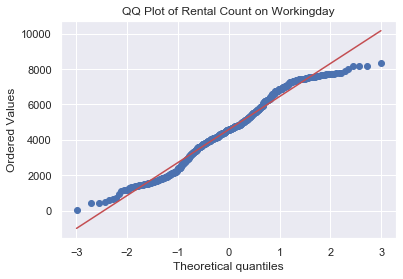

In [6]:
# Q2,  QQ plot
import pylab
scst.probplot(cnt_work, dist="norm", plot=pylab)
pylab.title('QQ Plot of Rental Count on Workingday') 
pylab.show()
# both tails are not normal (shorter/lighter/thinner than normal)

In [7]:
# Q2, Shapiro Wilk test for the normality of cnt_work,
print(scst.shapiro(cnt_work))

# p- value = 3.4888859090642654e-07, hence it's NOT normal.

(0.9765782356262207, 3.4888859090642654e-07)


In [ ]:
#comments: rental counts on working day is NOT normally distributed (from histogram, QQ plot and Shapiro-Wilk normality test)

# Q3

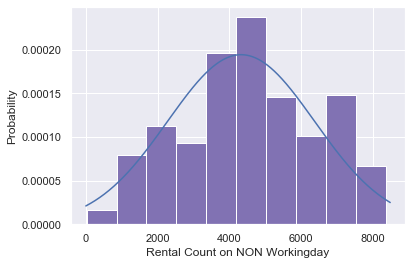

In [8]:
# check  the  normality  of  the  rental  count  on  NON-working  days
# Similar as above, using hostogram, QQ plot and Shapiro Wilk test

l = list(np.arange(0,8500,10))
y = scst.norm.pdf(l,loc = mean(cnt_off),scale = st.stdev(cnt_off)) 
plt.plot(l, y)
plt.hist(cnt_work, range=None, density=True, color='C4') 
plt.xlabel('Rental Count on NON Workingday') 
plt.ylabel('Probability') 
plt.show()
# histogram looks ok, quite symmetric.

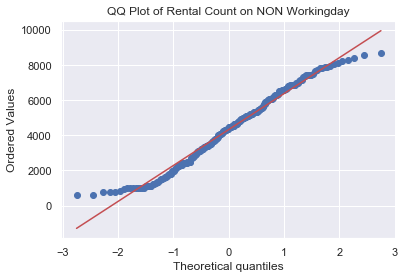

In [9]:
# Q3, QQ plot
import pylab
scst.probplot(cnt_off, dist="norm", plot=pylab)
pylab.title('QQ Plot of Rental Count on NON Workingday') 
pylab.show()
# both tails are not normal (shorter/lighter/thinner than normal)

In [10]:
# Q3, Shapiro Wilk test for the normality of cnt_off,
print(scst.shapiro(cnt_off))

# p- value = 0.0006035, hence it's NOT normal.

(0.9761089086532593, 0.0006035277037881315)


In [ ]:
#comments: rental counts on NONworking day is NOT normally distributed (from histogram, QQ plot and Shapiro-Wilk normality test)

# Q4

In [11]:
# Test if the variances of the rental count in two groups(working day and non-working day) are the same

Levene, p = scipy.stats.levene(cnt_work, cnt_off)
print(Levene)
print('p-value of Levene test is: ',p)

# Since both samples are NOT normal, we use Levene test to test the equality of variance.
# At alpha = 0.05, conclude: UNequal variances

4.345365092777056
p-value of Levene test is:  0.037457323247039445


In [12]:
scipy.stats.bartlett(cnt_work, cnt_off) # this test is NOT suitable when sample is NOT normal.


BartlettResult(statistic=2.5110442153377317, pvalue=0.11305100007087257)

# Q5: 
(1) 2 samples are independent,

(2) Both samples are not normal, 

(3) But sample size are very large hence, can use t-test,

(4) Variances are not equal hence use t-test with unequal variances

(5) One-sided test

# Q6

In [12]:
# Q6 : Test 1
import statsmodels.api
Test1, p, df = statsmodels.stats.weightstats.ttest_ind(cnt_work, cnt_off, alternative='larger', usevar='unequal', value=0)
print('Test statistic = ', Test1) # report the test statistic only
print('p-value is ',p) # report the p-value only
#print('degree of freedom ', df) # optional to print or not

# Conclusion: p-value = 0.055 > alpha = 0.01.
# Do not reject Ho. The average rental count on working and non-working days might be similar.

Test statistic =  1.6013720686967898
p-value is  0.055028689135085296


# Q7

In [13]:
# Q7: create the variable count.

count = np.where( (bike.cnt>2500)&(bike.cnt<=6500), 'med', np.where( bike.cnt<2500, 'low','high') )
#print(count)

In [14]:
# OR can use the code below to create variable count2 (which exactly the same as variable count):
bins = [0, 2500, 6500, np.inf]
labels = ['low', 'medium', 'high']
bike['count2'] = pd.cut(bike.cnt, bins, labels=labels, right=True)
# then can count the frequency of variable counts by:
print(bike['count2'].value_counts())
# count the frequency of variable count2 by order from low to high:
print(bike['count2'].value_counts()[[1,0,2]] )


medium    446
low       144
high      141
Name: count2, dtype: int64
low       144
medium    446
high      141
Name: count2, dtype: int64


In [15]:
# frequency table for variable count
tab = pd.crosstab(index=count,columns="count") 
print(tab)
# 144 days have count = low
# 141 days have count = high

col_0  count
row_0       
high     141
low      144
med      446


# Q8

In [16]:
# Q8: Then form a contingency table for two variables count and weathetsit
tab2 = pd.crosstab(bike.weathersit,count) 
print(tab2)


col_0       high  low  med
weathersit                
1            115   70  278
2             26   58  163
3              0   16    5


# Q9

In [17]:
# Q9: Since both weathersit and count are ORDINAL categorical variables.
# Should use linear-by-libear association test (name of the test)

ct = sm.stats.Table(np.asarray(tab2))

row_scores = np.asarray([3,2,1]) # scores for 3 rows of weather: good (1) has score = 3, not good (2) = 2, bad (3) = 1.

col_scores = np.asarray([3.5,1,2]) # scores for 3 columns of count:  high = 3.5, low = 1, med = 2

print(ct.test_ordinal_association(row_scores=row_scores, col_scores=col_scores))
# p-value <0.0001
# two variables are not independent.
# the level of count and the weather condition are associated

null_mean   3986.6925837320573
null_sd     11.666339535146724
pvalue      5.3002475382272025e-11
statistic   4063.25
zscore      6.56224825595905


# Q10:  

Should be either ANOVA or Kruskal-Wallis test

In [18]:
# Check assumptions for ANOVA (normality by Shapiro Wilk test, sample size, equal variances)

t1, p1 = scst.shapiro(bike.cnt[bike.season == 1])

t2, p2 = scst.shapiro(bike.cnt[bike.season == 2])

t3, p3 = scst.shapiro(bike.cnt[bike.season == 3])

t4, p4 = scst.shapiro(bike.cnt[bike.season == 4])

print('p-value of normality test for cnt in season 1 is: ',p1)

print('p-value of normality test for cnt in season 2 is: ',p2)

print('p-value of normality test for cnt in season 3 is: ',p3)

print('p-value of normality test for cnt in season 4 is: ',p4)

# all p-values are < 0.05.
# hence 4 samples might not come from normal.


p-value of normality test for cnt in season 1 is:  4.983239705325104e-07
p-value of normality test for cnt in season 2 is:  0.0079073840752244
p-value of normality test for cnt in season 3 is:  7.678098336327821e-05
p-value of normality test for cnt in season 4 is:  0.018196173012256622


In [19]:
# Q10: Check the sample size of 4 samples:
print('sample size of season 1 is: ', len(bike.cnt[bike.season == 1]))

print('sample size of season 2 is: ', len(bike.cnt[bike.season == 2]))

print('sample size of season 3 is: ', len(bike.cnt[bike.season == 3]))

print('sample size of season 4 is: ', len(bike.cnt[bike.season == 4]))

# all 4 samples are having large size.

sample size of season 1 is:  181
sample size of season 2 is:  184
sample size of season 3 is:  188
sample size of season 4 is:  178


In [20]:
# Q10: check equality of variances, using Levene test because all 4 samples are NOT normal

Levene2, p = scipy.stats.levene(bike.cnt[bike.season == 1], bike.cnt[bike.season == 2], bike.cnt[bike.season == 3], bike.cnt[bike.season == 4])
print('p-value of Levene test is: ',p)
# p-value = 0.0214. Suggests NONequal variances
#one might choose ANOVA, since sample size are big.
# others might choose NONPARAMETRIC test (Kruskal-Wallis)

p-value of Levene test is:  0.02138537590462272


In [21]:
###############    ANOVA 
bike['season'] = bike['season'].astype('category') 
mod = ols('cnt ~ season', data=bike).fit()
anova = sm.stats.anova_lm(mod, typ=1)
print(anova)
# p-value = 6.720391e-67
# hence the 4 season are having UNEQUAL average count

             df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN


In [22]:
####  KRUSKALL-WALLIS TEST
from scipy.stats import kruskal
kruskal = scipy.stats.kruskal(bike.cnt[bike.season == 1], bike.cnt[bike.season == 2], bike.cnt[bike.season == 3], bike.cnt[bike.season == 4])

print(kruskal)
# p-value = 4.110755793069794e-54
# the rental count of 4 seasons are not from the same distribution.

KruskalResult(statistic=250.9335046488973, pvalue=4.110755793069794e-54)
